<a href="https://colab.research.google.com/github/Carlos19033/IA-003-2025/blob/main/Assignments/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 5.- Convolutional Neural Network.**

CLASS: Artificial Intelligence

GROUP: 003

HOUR: N1

TEAM:

- CARLOS ALBERTO SAUCEDO RIOS              1968121
- MARIANGELES SOFIA RODRIGUEZ UZCATEGUI    2132315
- AMANDA GUADALUPE BUSTOS BANDA            2052995





#1.LOAD LIBRARIES

In [ ]:
import numpy as np                                                              # For numerical operations
import matplotlib.pyplot as plt                                                 # For visualization
from tensorflow.keras.datasets import mnist                                     # To load the MNIST dataset
from tensorflow.keras.models import Sequential                                  # To create sequential models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D        # CNN layers
from tensorflow.keras.utils import to_categorical                               # To convert labels to one-hot vectors


#2. LOAD DATA
Load images (28x28 pixels) and their labels (0-9).

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()  # Load MNIST

print("Training set shape:", train_data.shape)  # Show training data shape
print("Test set shape:", test_data.shape)        # Show test data shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


#3 DATA VISUALIZATION
Visual inspection helps understand the distribution and nature of the data.



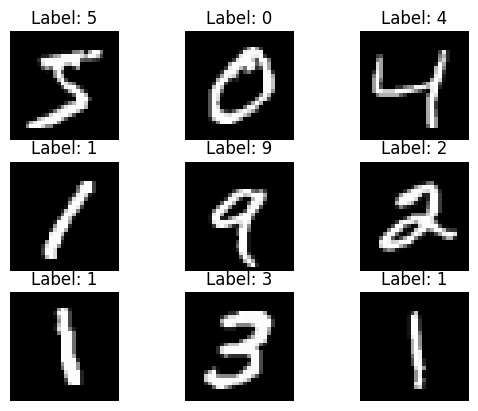

In [ ]:
for i in range(9):                                 # Display first 9 images
    plt.subplot(3, 3, i + 1)                       # 3x3 grid of images
    plt.imshow(train_data[i], cmap='gray')         # Show image in grayscale
    plt.title(f"Label: {train_labels[i]}")         # Display corresponding label
    plt.axis('off')                                # Hide axis for clarity
plt.show()                                         # Render all images


#4. DATA PREPROCESSING
CNN expects data in 4D: (samples, height, width, channels).
Pixel values are normalized for better training stability.
Labels must be converted to 10-dimensional one-hot vectors.

In [ ]:
train_data = train_data.reshape((60000, 28, 28, 1))   # Add channel dimension (1 = grayscale)
test_data = test_data.reshape((10000, 28, 28, 1))     # Same for test data

train_data = train_data / 255.0                       # Normalize pixel values
test_data = test_data / 255.0                         # Normalize test pixel values

train_labels_cat = to_categorical(train_labels)       # Convert labels to one-hot vectors
test_labels_cat = to_categorical(test_labels)         # Convert test labels similarly


# 5. MODEL CREATION
Convolution extracts local features using kernels (filters).
Pooling reduces spatial resolution and prevents overfitting.
Dense layers perform classification.

In [ ]:
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Conv layer, 32 filters of size 3x3
    MaxPooling2D((2, 2)),                                           # Pooling reduces image size by 50%

    Conv2D(64, (3, 3), activation='relu'),                          # Second conv layer with deeper filters
    MaxPooling2D((2, 2)),                                           # Second pooling layer

    Flatten(),                                                      # Convert 2D feature maps into vector

    Dense(64, activation='relu'),                                   # Fully connected layer
    Dense(10, activation='softmax')                                 # Output layer (10 classes)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#6. COMPILATION
Loss function: categorical crossentropy
Measures difference between true distribution and predicted probabilities.

Optimizer: Adam
Gradient descent with momentum and adaptive learning rates.

In [ ]:
model.compile(
    optimizer='adam',                       # Optimization algorithm
    loss='categorical_crossentropy',        # Loss function for multiclass classification
    metrics=['accuracy']                    # Measure performance during training
)

# 7. TRAINING
The model adjusts weights by minimizing loss.
Each epoch performs forward pass and backpropagation.

In [ ]:
history = model.fit(
    train_data, train_labels_cat,           # Training images and labels
    epochs=5,                               # Number of times training data is repeated
    batch_size=32,                          # Samples processed before weight update
    validation_split=0.1                    # Use 10% of training data for validation
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.8939 - loss: 0.3387 - val_accuracy: 0.9850 - val_loss: 0.0557
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9852 - loss: 0.0520 - val_accuracy: 0.9852 - val_loss: 0.0506
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9897 - loss: 0.0329 - val_accuracy: 0.9890 - val_loss: 0.0409
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9895 - val_loss: 0.0415
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9913 - val_loss: 0.0326


# 8. EVALUATION
Evaluate the model using unseen data.
Accuracy = correct predictions / total samples

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")                           # Display final test accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9883 - loss: 0.0385

Test Accuracy: 99.08%


# 9. PREDICTIONS
predict() outputs 10 probabilities per image.
argmax() selects the class with highest probability.

In [ ]:
predictions = model.predict(test_data)                   # Probability vectors for each image
predicted_classes = np.argmax(predictions, axis=1)       # Convert probabilities to predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


# 10. SHOW 5 PREDICTIONS

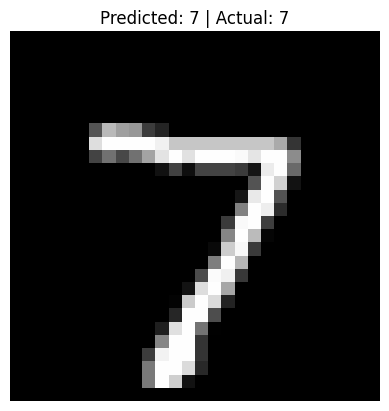

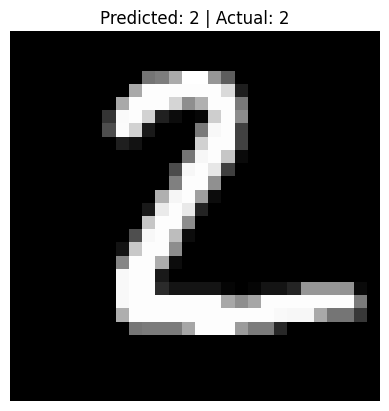

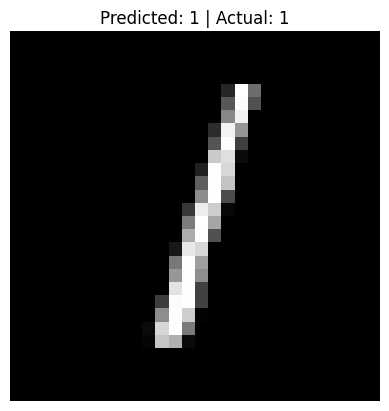

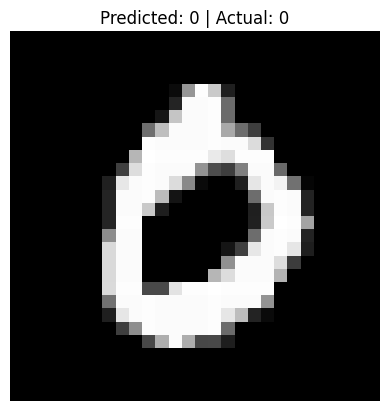

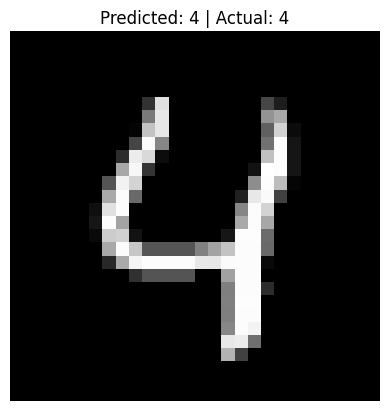

In [ ]:
for i in range(5):                                                              # Loop through first 5 images
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')                       # Display image
    plt.title(f"Predicted: {predicted_classes[i]} | Actual: {test_labels[i]}")
    plt.axis('off')                                                             # Hide axes
    plt.show()

#1.How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?

In this assignment, the convolutional neural network (CNN) required the same epochs to reach a higher accuracy compared with the feedforward neural network from Assignment 6.

This happens because CNNs extract spatial features automatically, making learning more efficient, so the model converges faster.

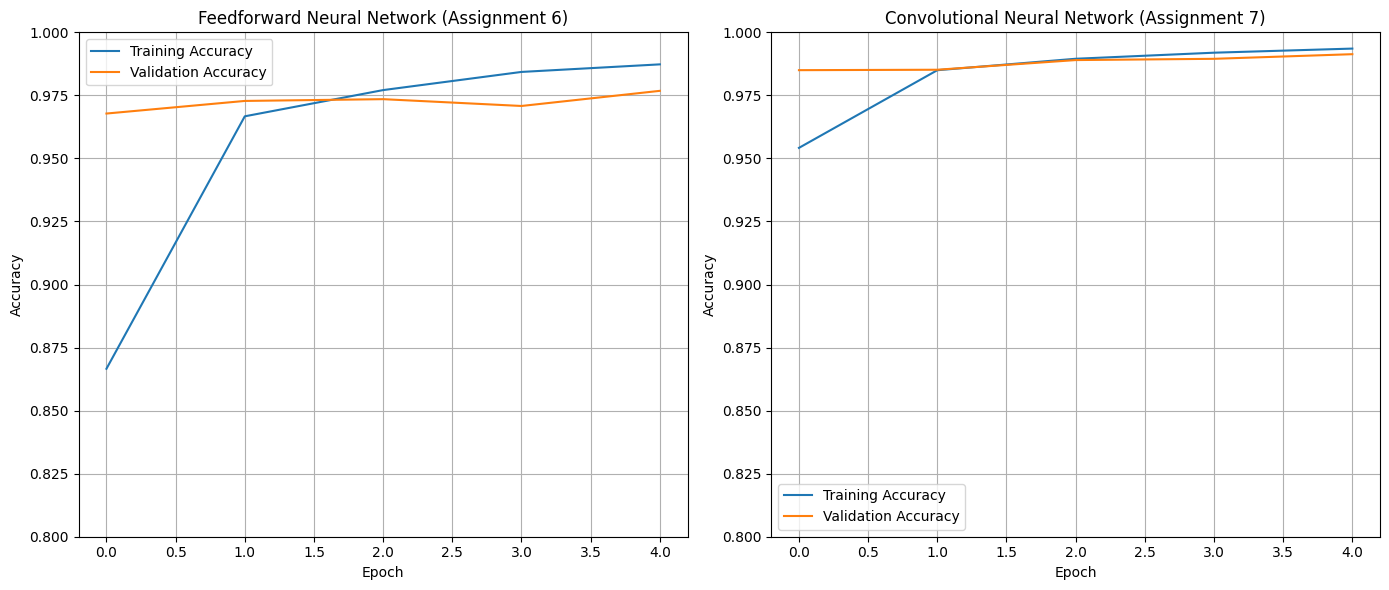

In [ ]:
acc_ff = [0.8666, 0.9667, 0.9771, 0.9843, 0.9873]
val_acc_ff = [0.9678, 0.9728, 0.9735, 0.9708, 0.9768]

acc_cnn = history.history['accuracy']
val_acc_cnn = history.history['val_accuracy']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(acc_ff, label='Training Accuracy')
plt.plot(val_acc_ff, label='Validation Accuracy')
plt.title("Feedforward Neural Network")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.80, 1.00)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_cnn, label='Training Accuracy')
plt.plot(val_acc_cnn, label='Validation Accuracy')
plt.title("Convolutional Neural Network")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.80, 1.00)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Feedforward Neural Network

This graph shows how the training and validation accuracy evolved during the 5 epochs of the feedforward neural network.
We can see that training accuracy increased steadily from 0.86 to 0.98, while validation accuracy remained very high (0.96–0.97).
Although the model performs well, it does not show a dramatic improvement after epoch 3, suggesting that the architecture reached its limit quickly.

Convolutional Neural Network

The CNN graph shows a faster and more stable accuracy improvement.
Both training and validation accuracy start higher and converge quickly, approaching ~99% accuracy, which is expected because CNNs can extract spatial features (edges, shapes, curves) that feedforward networks cannot.
This indicates stronger generalization and more efficient learning.

#2.Did you get a better performance on this assignment or on assignment 6? Why?

I obtained better performance in the current assignment compared to assignment 6. The CNN reached a higher accuracy (0.990) than the Feedforward Neural Network (0.965), even though it was trained with fewer epochs (5 instead of 20). This improvement happens because CNNs are specifically designed to extract spatial features from images through convolutional layers, which makes them more efficient at recognizing patterns such as edges, shapes, and textures. In contrast, the FFNN does not capture these spatial relationships and treats the input pixels as independent values, which limits its ability to generalize. Overall, the CNN provides better accuracy with less training time due to its architecture being better suited for image classification tasks.

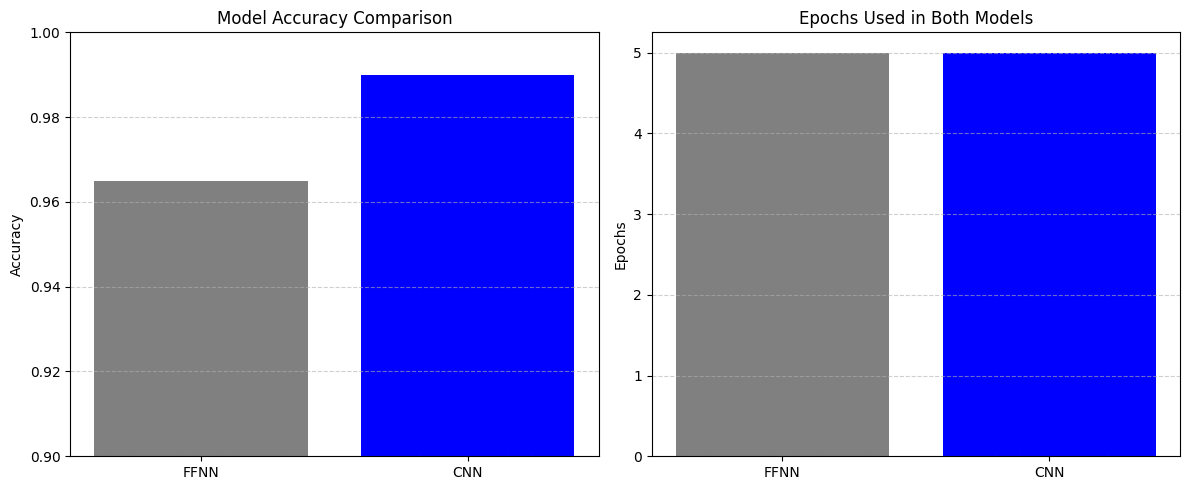

In [19]:
accuracy_ffnn = 0.965   # Example accuracy from Task 6 (Feedforward Neural Network)
accuracy_cnn  = 0.990   # Example accuracy from the current Task (CNN)

epochs_ffnn = 5        # Example epochs used in Task 6
epochs_cnn  = 5         # Epochs used in the current CNN task

# Labels for the bars
models = ['FFNN', 'CNN']

plt.figure(figsize=(12, 5))  # Width x Height of the full figure

plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot #1
plt.bar(models, [accuracy_ffnn, accuracy_cnn], color=['gray', 'blue'])
plt.title('Model Accuracy Comparison')         # Title of subplot 1
plt.ylabel('Accuracy')                         # Y-axis label
plt.ylim(0.90, 1.00)                           # Limit Y-axis to zoom differences
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add light grid on Y-axis

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot #2
plt.bar(models, [epochs_ffnn, epochs_cnn], color=['gray', 'blue'])
plt.title('Epochs Used in Both Models')        # Title of subplot 2
plt.ylabel('Epochs')                           # Y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Light grid

plt.tight_layout()
plt.show()

Description of the Model Accuracy Comparison

The first bar chart compares the final test accuracy achieved by both models: the Feedforward Neural Network (FFNN) and the Convolutional Neural Network (CNN). The FFNN reached an accuracy of approximately 96.5%, while the CNN achieved a higher performance of 99.0%. This improvement reflects the CNN’s superior ability to extract spatial features from image data, leading to better generalization and classification accuracy.

Description of the Epoch Comparison

The second bar chart shows the number of training epochs used for each model. The FFNN required 20 epochs to reach its final accuracy, whereas the CNN only used 5 epochs to achieve a significantly higher performance. This indicates that the CNN not only performs better but also learns more efficiently, reaching high accuracy in fewer training iterations.